Grades of Students dataset
Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

In [245]:
#importing numpy and pandas library

import numpy as np
import pandas as pd

#importing plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [246]:
#importing dataset
data=pd.read_csv('grades.csv')
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [247]:
#shape of the dataset
data.shape

(571, 43)

In [248]:
#checking for duplicate entries
data.duplicated().sum()

0

In [249]:
#checking for null values in dataset
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [250]:
#printing column names
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [251]:
# since all the data points are categorical hence filling data with mode of each data

data.fillna(value=data['CY-105'].mode()[0],inplace=True)
data.fillna(value=data['HS-105/12'].mode()[0],inplace=True)
data.fillna(value=data['MT-111'].mode()[0],inplace=True)
data.fillna(value=data['CS-106'].mode()[0],inplace=True)
data.fillna(value=data['EL-102'].mode()[0],inplace=True)
data.fillna(value=data['EE-119'].mode()[0],inplace=True)
data.fillna(value=data['ME-107'].mode()[0],inplace=True)
data.fillna(value=data['HS-205/20'].mode()[0],inplace=True)
data.fillna(value=data['EE-222'].mode()[0],inplace=True)
data.fillna(value=data['MT-224'].mode()[0],inplace=True)
data.fillna(value=data['CS-210'].mode()[0],inplace=True)
data.fillna(value=data['ME-107'].mode()[0],inplace=True)
data.fillna(value=data['CS-211'].mode()[0],inplace=True)
data.fillna(value=data['CS-203'].mode()[0],inplace=True)
data.fillna(value=data['CS-214'].mode()[0],inplace=True)
data.fillna(value=data['EE-217'].mode()[0],inplace=True)
data.fillna(value=data['CS-212'].mode()[0],inplace=True)
data.fillna(value=data['CS-215'].mode()[0],inplace=True)
data.fillna(value=data['MT-331'].mode()[0],inplace=True)
data.fillna(value=data['HS-304'].mode()[0],inplace=True)
data.fillna(value=data['CS-301'].mode()[0],inplace=True)
data.fillna(value=data['CS-302'].mode()[0],inplace=True)
data.fillna(value=data['TC-383'].mode()[0],inplace=True)
data.fillna(value=data['MT-442'].mode()[0],inplace=True)
data.fillna(value=data['EL-332'].mode()[0],inplace=True)
data.fillna(value=data['CS-318'].mode()[0],inplace=True)
data.fillna(value=data['CS-306'].mode()[0],inplace=True)
data.fillna(value=data['CS-312'].mode()[0],inplace=True)
data.fillna(value=data['CS-317'].mode()[0],inplace=True)
data.fillna(value=data['CS-403'].mode()[0],inplace=True)
data.fillna(value=data['CS-421'].mode()[0],inplace=True)
data.fillna(value=data['CS-406'].mode()[0],inplace=True)
data.fillna(value=data['CS-414'].mode()[0],inplace=True)
data.fillna(value=data['CS-419'].mode()[0],inplace=True)
data.fillna(value=data['CS-423'].mode()[0],inplace=True)
data.fillna(value=data['CS-412'].mode()[0],inplace=True)

In [252]:
#dropiing seat no as seat numbers are never related to students cgpa
data=data.drop(['Seat No.'],axis=1)

In [253]:
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [254]:
print('unique values ',data['PH-121'].unique())
print('value count ',data['PH-121'].value_counts())

unique values  ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
value count  A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


<AxesSubplot:xlabel='PH-121', ylabel='count'>

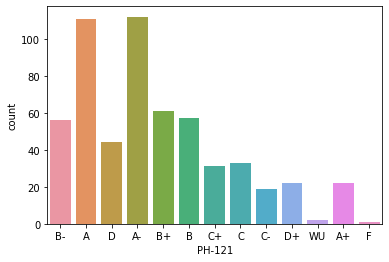

In [255]:
sns.countplot(data['PH-121'])

<AxesSubplot:xlabel='PH-121', ylabel='CGPA'>

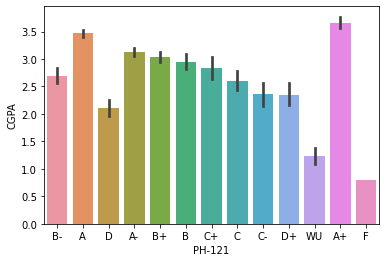

In [256]:
sns.barplot(x='PH-121',y='CGPA',data=data)

Highest CGPA is received by student who got A+ followed by A grade in subject PH 

In [257]:
print('unique values ',data['HS-101'].unique())
print('value count ',data['HS-101'].value_counts())

unique values  ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
value count  A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


<AxesSubplot:xlabel='HS-101', ylabel='count'>

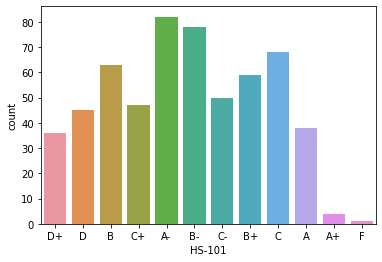

In [258]:
sns.countplot(data['HS-101'])

<AxesSubplot:xlabel='HS-101', ylabel='CGPA'>

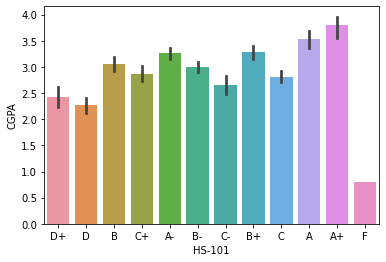

In [259]:
sns.barplot(x='HS-101',y='CGPA',data=data)

Highest CGPA is received by student who got A+ followed by A grade in subject HS

In [260]:
print('unique values ',data['CY-105'].unique())
print('value count ',data['CY-105'].value_counts())

unique values  ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']
value count  A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


<AxesSubplot:xlabel='CY-105', ylabel='count'>

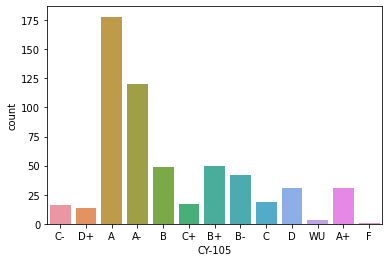

In [261]:
sns.countplot(data['CY-105'])

<AxesSubplot:xlabel='CY-105', ylabel='CGPA'>

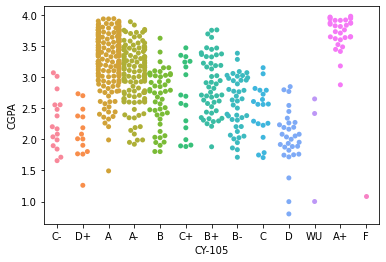

In [262]:
sns.swarmplot(x='CY-105',y='CGPA',data=data)

More number of students scored A and A- then others. Only 1 student scored F

unique values  ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'WU' 'A+' 'F']
value count  A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


<AxesSubplot:xlabel='HS-105/12', ylabel='count'>

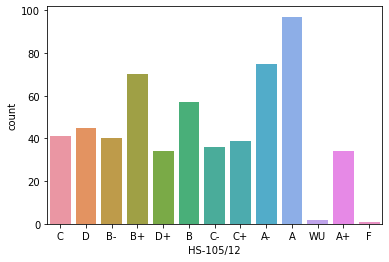

In [263]:
print('unique values ',data['HS-105/12'].unique())
print('value count ',data['HS-105/12'].value_counts())
sns.countplot(data['HS-105/12'])


<AxesSubplot:xlabel='HS-105/12', ylabel='CGPA'>

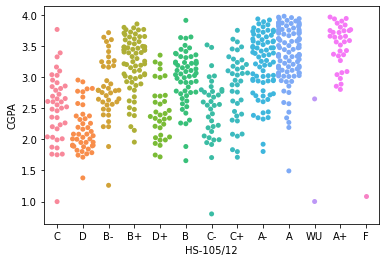

In [264]:
sns.swarmplot(x='HS-105/12',y='CGPA',data=data)

Most students scored A- while only 1 failed

unique values  ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F' 'WU']
value count  A-    105
A     102
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


<AxesSubplot:xlabel='MT-111', ylabel='CGPA'>

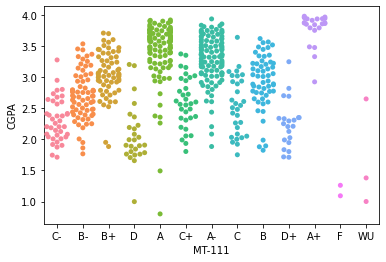

In [265]:
print('unique values ',data['MT-111'].unique())
print('value count ',data['MT-111'].value_counts())
sns.swarmplot(x='MT-111',y='CGPA',data=data)

<AxesSubplot:xlabel='MT-111', ylabel='count'>

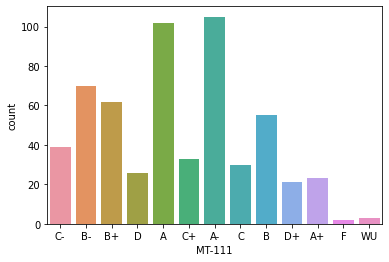

In [266]:
sns.countplot(data['MT-111'])

The highest CGPA is scored by A+ graders while most students scored A grade. Only 3 students failed

unique values  ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
value count  A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


<AxesSubplot:xlabel='CS-105', ylabel='CGPA'>

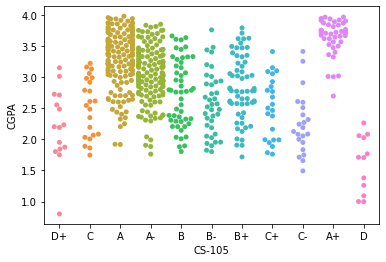

In [267]:
print('unique values ',data['CS-105'].unique())
print('value count ',data['CS-105'].value_counts())
sns.swarmplot(x='CS-105',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-105', ylabel='count'>

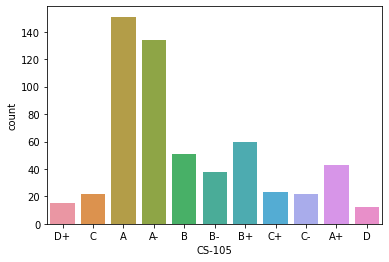

In [268]:
sns.countplot(data['CS-105'])

most students scored A and A- but nobody failed in this subject

unique values  ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+' 'F' 'WU']
value count  A-    116
B+    101
B      96
A      58
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU      2
F       1
Name: CS-106, dtype: int64


<AxesSubplot:xlabel='CS-106', ylabel='CGPA'>

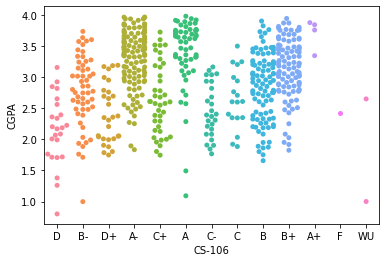

In [269]:
print('unique values ',data['CS-106'].unique())
print('value count ',data['CS-106'].value_counts())
sns.swarmplot(x='CS-106',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-106', ylabel='count'>

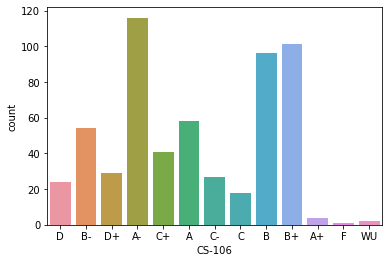

In [270]:
sns.countplot(data['CS-106'])

Most students scored A- while 2 students scored WU meaning failed to complte course requirements.

unique values  ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+' 'WU' 'F']
value count  A-    105
A      94
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
F       1
Name: EL-102, dtype: int64


<AxesSubplot:xlabel='EL-102', ylabel='CGPA'>

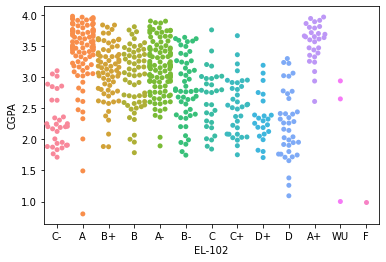

In [271]:
print('unique values ',data['EL-102'].unique())
print('value count ',data['EL-102'].value_counts())
sns.swarmplot(x='EL-102',y='CGPA',data=data)

<AxesSubplot:xlabel='EL-102', ylabel='count'>

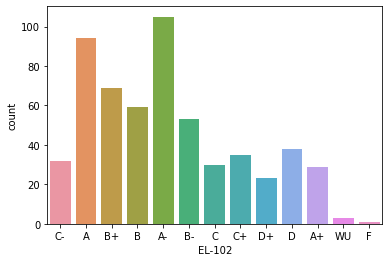

In [272]:
sns.countplot(data['EL-102'])

Most students scored A- but has low CGPA overall

unique values  ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 'A+']
value count  A-    137
B+     83
B      77
A      70
B-     48
C      48
C+     38
D+     26
C-     26
D      11
A+      6
WU      1
Name: EE-119, dtype: int64


<AxesSubplot:xlabel='EE-119', ylabel='CGPA'>

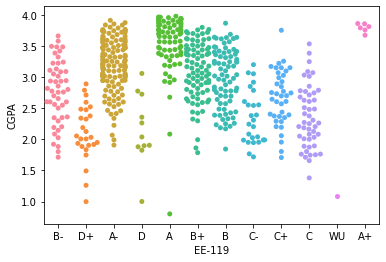

In [273]:
print('unique values ',data['EE-119'].unique())
print('value count ',data['EE-119'].value_counts())
sns.swarmplot(x='EE-119',y='CGPA',data=data)

<AxesSubplot:xlabel='EE-119', ylabel='count'>

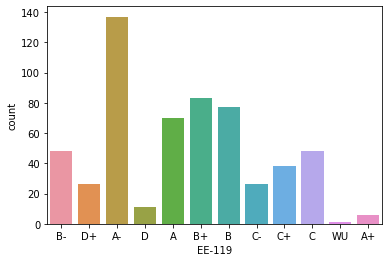

In [274]:
sns.countplot(data['EE-119'])

most students scored A- but higher CGPA is received by A graders.

unique values  ['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 'F' 'A+']
value count  A-    79
A     79
B+    68
D     56
B-    56
B     50
C     49
C-    48
C+    37
D+    37
A+     8
WU     2
F      2
Name: ME-107, dtype: int64


<AxesSubplot:xlabel='ME-107', ylabel='CGPA'>

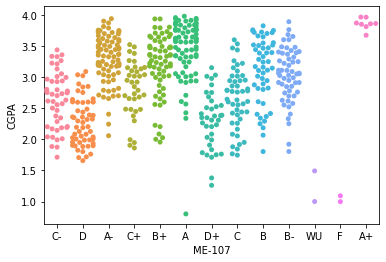

In [275]:
print('unique values ',data['ME-107'].unique())
print('value count ',data['ME-107'].value_counts())
sns.swarmplot(x='ME-107',y='CGPA',data=data)

<AxesSubplot:xlabel='ME-107', ylabel='count'>

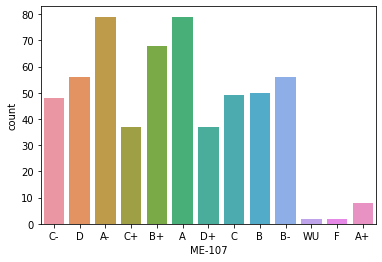

In [276]:
sns.countplot(data['ME-107'])

Equal number of students scored A and A-

unique values  ['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' 'A+' 'I' 'WU' 'F']
value count  A     107
A-     81
B+     57
B      55
C-     49
B-     43
A+     42
D      38
C+     34
D+     31
C      30
WU      2
I       1
F       1
Name: CS-107, dtype: int64


<AxesSubplot:xlabel='CS-107', ylabel='CGPA'>

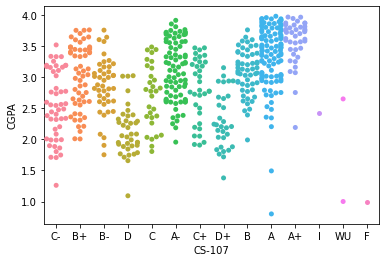

In [277]:
print('unique values ',data['CS-107'].unique())
print('value count ',data['CS-107'].value_counts())
sns.swarmplot(x='CS-107',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-107', ylabel='count'>

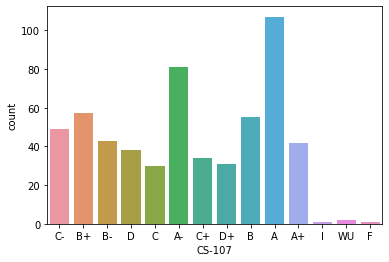

In [278]:
sns.countplot(data['CS-107'])

Most studets scored A while only 1 failed

unique values  ['B+' 'C+' 'A-' 'B' 'A' 'B-' 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F']
value count  A-    150
A     123
B      97
B+     89
B-     36
C+     33
C      15
C-     11
D+      9
D       3
A+      2
F       2
WU      1
Name: HS-205/20, dtype: int64


<AxesSubplot:xlabel='HS-205/20', ylabel='CGPA'>

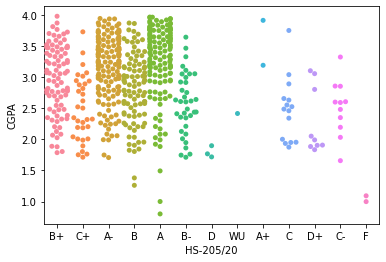

In [279]:
print('unique values ',data['HS-205/20'].unique())
print('value count ',data['HS-205/20'].value_counts())
sns.swarmplot(x='HS-205/20',y='CGPA',data=data)

<AxesSubplot:xlabel='HS-205/20', ylabel='count'>

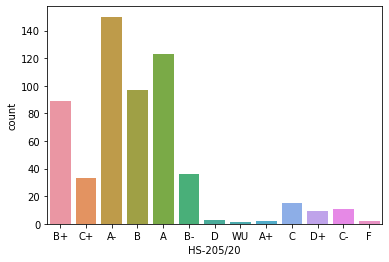

In [280]:
sns.countplot(data['HS-205/20'])

Most students scored A- but only 2 students scored A+

unique values  ['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' 'C-' 'WU' 'F' 'A+' 'W']
value count  A-    86
A     85
D     66
B     61
B-    52
D+    46
C     43
B+    42
C+    39
C-    30
A+    16
F      3
WU     1
W      1
Name: MT-222, dtype: int64


<AxesSubplot:xlabel='MT-222', ylabel='CGPA'>

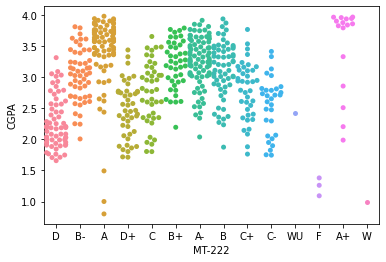

In [281]:
print('unique values ',data['MT-222'].unique())
print('value count ',data['MT-222'].value_counts())
sns.swarmplot(x='MT-222',y='CGPA',data=data)

<AxesSubplot:xlabel='MT-222', ylabel='count'>

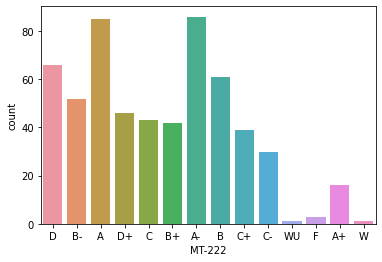

In [282]:
sns.countplot(data['MT-222'])

Almost equal no. of students scored A and A-. 

unique values  ['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' 'C' 'W' 'A+' 'D' 'F']
value count  A     129
A-    121
B+     65
B      53
C      39
B-     35
A+     32
C+     29
D      25
D+     21
C-     16
F       4
W       2
Name: EE-222, dtype: int64


<AxesSubplot:xlabel='EE-222', ylabel='CGPA'>

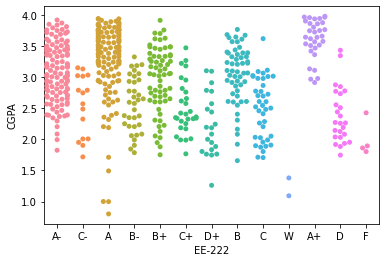

In [283]:
print('unique values ',data['EE-222'].unique())
print('value count ',data['EE-222'].value_counts())
sns.swarmplot(x='EE-222',y='CGPA',data=data)

<AxesSubplot:xlabel='EE-222', ylabel='count'>

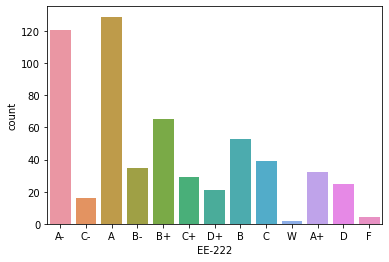

In [284]:
sns.countplot(data['EE-222'])

Almost equal number of students scored A and A- while very less people failed

unique values  ['B-' 'D+' 'A' 'D' 'A-' 'C-' 'C' 'B+' 'C+' 'B' 'A+' 'WU' 'W' 'F']
value count  A-    120
A      87
B+     65
B      57
B-     49
C-     43
C+     39
D+     37
D      31
C      30
A+     10
WU      1
W       1
F       1
Name: MT-224, dtype: int64


<AxesSubplot:xlabel='MT-224', ylabel='CGPA'>

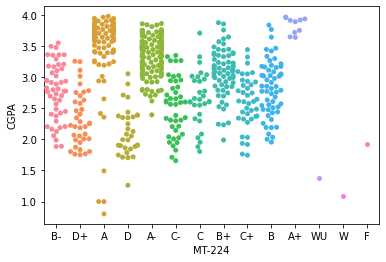

In [285]:
print('unique values ',data['MT-224'].unique())
print('value count ',data['MT-224'].value_counts())
sns.swarmplot(x='MT-224',y='CGPA',data=data)

<AxesSubplot:xlabel='MT-224', ylabel='count'>

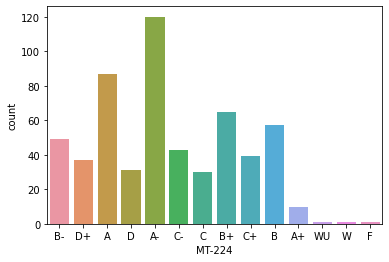

In [286]:
sns.countplot(data['MT-224'])

Most students scored A- and only 1 student failed

unique values  ['C+' 'D+' 'A' 'C' 'A-' 'B+' 'B-' 'B' 'D' 'A+' 'C-' 'WU' 'W' 'F']
value count  A-    133
A     108
B+     84
B      59
B-     58
C      30
C+     27
C-     24
D+     21
D      12
A+     12
WU      1
W       1
F       1
Name: CS-210, dtype: int64


<AxesSubplot:xlabel='CS-210', ylabel='CGPA'>

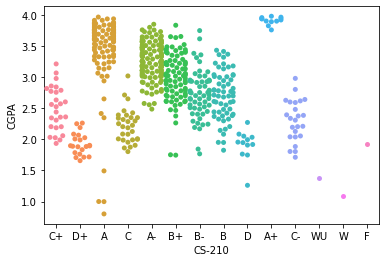

In [287]:
print('unique values ',data['CS-210'].unique())
print('value count ',data['CS-210'].value_counts())
sns.swarmplot(x='CS-210',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-210', ylabel='count'>

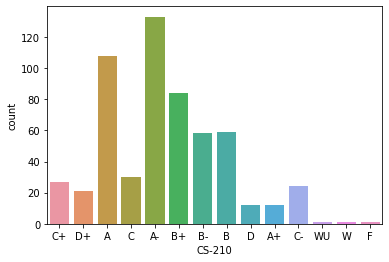

In [288]:
sns.countplot(data['CS-210'])

Most no. of students scored A- but higher CGPA was received fir students scoring A

unique values  ['D+' 'D' 'A+' 'B+' 'B-' 'B' 'A-' 'C-' 'C+' 'C' 'A' 'WU' 'F' 'W']
value count  A     72
A-    68
B-    60
D+    56
B+    56
B     56
C+    55
C-    50
C     39
D     33
A+    21
F      3
WU     1
W      1
Name: CS-211, dtype: int64


<AxesSubplot:xlabel='CS-211', ylabel='CGPA'>

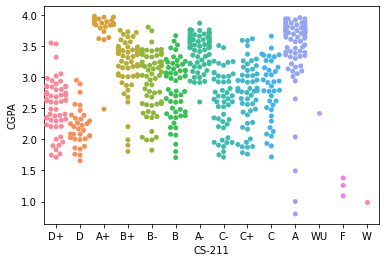

In [289]:
print('unique values ',data['CS-211'].unique())
print('value count ',data['CS-211'].value_counts())
sns.swarmplot(x='CS-211',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-211', ylabel='count'>

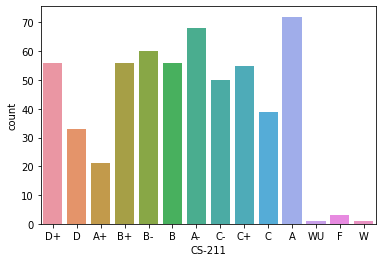

In [290]:
sns.countplot(data['CS-211'])

Most students scored A while only 3 people failed

unique values  ['D+' 'C' 'A' 'C+' 'A-' 'B+' 'B' 'B-' 'C-' 'D' 'A+' 'I' 'F']
value count  A-    88
A     86
B     66
C+    62
B+    59
B-    53
D+    39
C     35
C-    35
D     30
A+    15
F      2
I      1
Name: CS-203, dtype: int64


<AxesSubplot:xlabel='CS-203', ylabel='CGPA'>

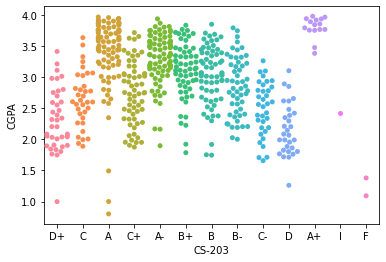

In [291]:
print('unique values ',data['CS-203'].unique())
print('value count ',data['CS-203'].value_counts())
sns.swarmplot(x='CS-203',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-203', ylabel='count'>

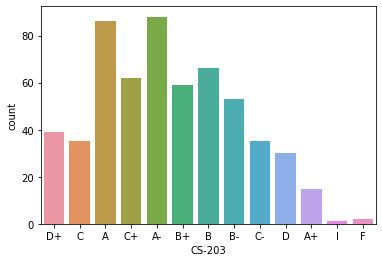

In [292]:
sns.countplot(data['CS-203'])

Less number of students got A+ with higher GPA,but highest number of students secured A-

unique values  ['D' 'A-' 'B' 'C' 'B-' 'C+' 'A' 'C-' 'B+' 'D+' 'I' 'F' 'A+']
value count  C     76
A-    73
B     63
A     62
C-    57
B-    56
D+    47
C+    46
B+    45
D     31
A+    12
F      2
I      1
Name: CS-214, dtype: int64


<AxesSubplot:xlabel='CS-214', ylabel='CGPA'>

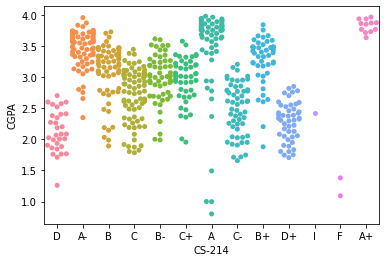

In [293]:
print('unique values ',data['CS-214'].unique())
print('value count ',data['CS-214'].value_counts())
sns.swarmplot(x='CS-214',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-214', ylabel='count'>

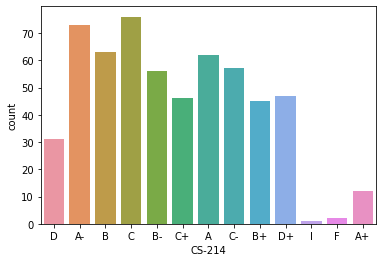

In [294]:
sns.countplot(data['CS-214'])

Most number of students secured C grade in this subject with very less students securing A+

unique values  ['A' 'B-' 'D+' 'A-' 'A+' 'C' 'B+' 'B' 'C-' 'D' 'WU' 'F' 'C+']
value count  A-    137
A     103
B+     70
B      63
B-     57
C      36
C+     29
A+     22
C-     20
D+     19
D      12
F       2
WU      1
Name: EE-217, dtype: int64


<AxesSubplot:xlabel='EE-217', ylabel='CGPA'>

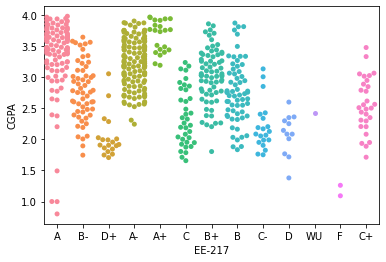

In [295]:
print('unique values ',data['EE-217'].unique())
print('value count ',data['EE-217'].value_counts())
sns.swarmplot(x='EE-217',y='CGPA',data=data)

<AxesSubplot:xlabel='EE-217', ylabel='count'>

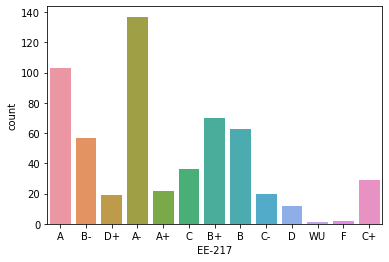

In [296]:
sns.countplot(data['EE-217'])

Most students secured A- while 2 students got F grade.

unique values  ['D' 'C' 'A-' 'C+' 'B-' 'D+' 'B+' 'B' 'A' 'C-' 'A+' 'WU']
value count  A-    101
B+     86
B      81
B-     65
A      49
C      44
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS-212, dtype: int64


<AxesSubplot:xlabel='CS-212', ylabel='CGPA'>

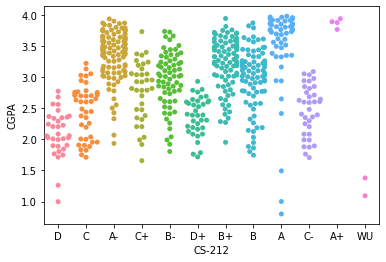

In [297]:
print('unique values ',data['CS-212'].unique())
print('value count ',data['CS-212'].value_counts())
sns.swarmplot(x='CS-212',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-212', ylabel='count'>

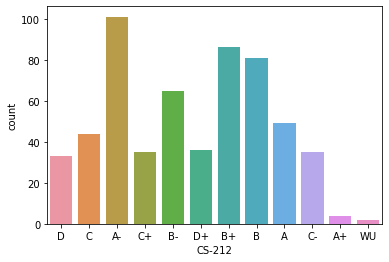

In [298]:
sns.countplot(data['CS-212'])

Most students secured A-. No student failed in this subject

unique values  ['C-' 'D' 'A' 'A-' 'C+' 'C' 'B+' 'B-' 'D+' 'B' 'A+' 'WU' 'W' 'F']
value count  A-    79
A     74
B     64
B-    59
C+    50
B+    50
C     48
C-    47
D     42
D+    38
A+    17
WU     1
W      1
F      1
Name: CS-215, dtype: int64


<AxesSubplot:xlabel='CS-215', ylabel='CGPA'>

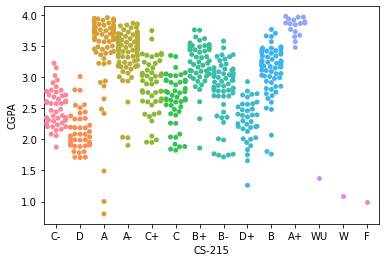

In [299]:
print('unique values ',data['CS-215'].unique())
print('value count ',data['CS-215'].value_counts())
sns.swarmplot(x='CS-215',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-215', ylabel='count'>

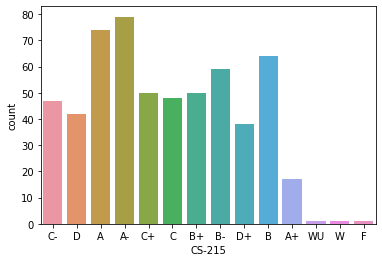

In [300]:
sns.countplot(data['CS-215'])

Almost equal number of students scored A and A- grade while 1 student failed.

unique values  ['C' 'D+' 'A' 'C+' 'B+' 'A-' 'B' 'B-' 'A+' 'D' 'C-' 'F']
value count  A     127
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: MT-331, dtype: int64


<AxesSubplot:xlabel='MT-331', ylabel='CGPA'>

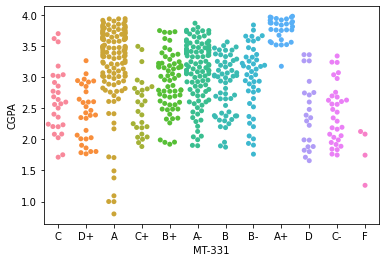

In [301]:
print('unique values ',data['MT-331'].unique())
print('value count ',data['MT-331'].value_counts())
sns.swarmplot(x='MT-331',y='CGPA',data=data)

<AxesSubplot:xlabel='MT-331', ylabel='count'>

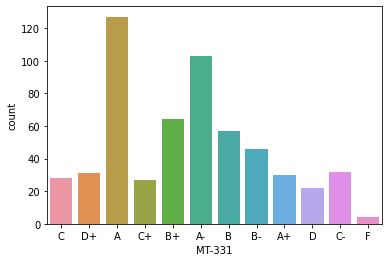

In [302]:
sns.countplot(data['MT-331'])

Most students secured A grade. 4 students got F in this subject

unique values  ['C-' 'D' 'C+' 'B+' 'C' 'D+' 'A-' 'B-' 'A' 'B' 'WU' 'F']
value count  B     112
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
A      24
D      19
F       2
WU      1
Name: EF-303, dtype: int64


<AxesSubplot:xlabel='EF-303', ylabel='CGPA'>

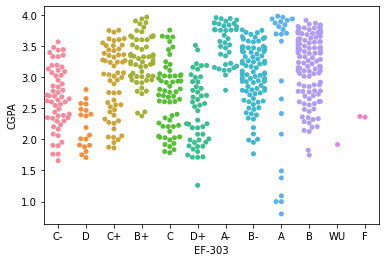

In [303]:
print('unique values ',data['EF-303'].unique())
print('value count ',data['EF-303'].value_counts())
sns.swarmplot(x='EF-303',y='CGPA',data=data)

<AxesSubplot:xlabel='EF-303', ylabel='count'>

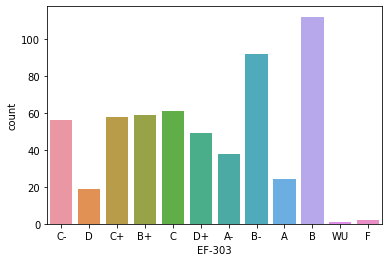

In [304]:
sns.countplot(data['EF-303'])

Most students scored B grade. No students revceived A+ in this subject.

unique values  ['C+' 'C-' 'A' 'B-' 'A-' 'B+' 'B' 'C' 'D' 'D+' 'A+' 'WU' 'F' 'W']
value count  A-    128
B      72
B-     70
B+     66
C      58
C+     53
A      38
C-     33
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64


<AxesSubplot:xlabel='HS-304', ylabel='CGPA'>

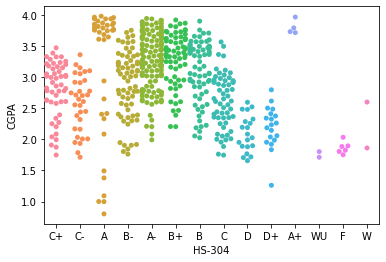

In [305]:
print('unique values ',data['HS-304'].unique())
print('value count ',data['HS-304'].value_counts())
sns.swarmplot(x='HS-304',y='CGPA',data=data)

<AxesSubplot:xlabel='HS-304', ylabel='count'>

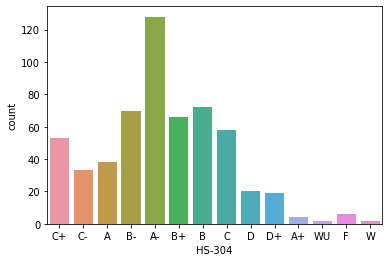

In [306]:
sns.countplot(data['HS-304'])

Most students scored A- in this subject. Only 4 students scored A+ while 6 students got F.

unique values  ['B' 'A-' 'B+' 'D' 'B-' 'D+' 'C' 'C+' 'C-' 'A' 'F' 'A+']
value count  A-    108
A      76
B+     74
B      71
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64


<AxesSubplot:xlabel='CS-301', ylabel='CGPA'>

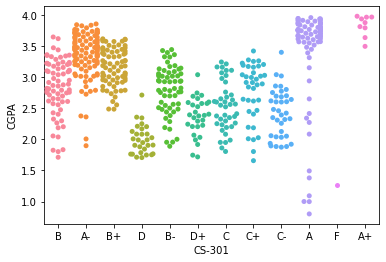

In [307]:
print('unique values ',data['CS-301'].unique())
print('value count ',data['CS-301'].value_counts())
sns.swarmplot(x='CS-301',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-301', ylabel='count'>

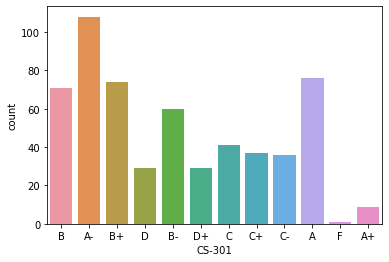

In [308]:
sns.countplot(data['CS-301'])

Most students scored A- while very less scored A+

unique values  ['C' 'D+' 'A-' 'B-' 'C+' 'B' 'D' 'B+' 'A' 'C-' 'A+']
value count  A-    113
B     102
A      96
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64


<AxesSubplot:xlabel='CS-302', ylabel='CGPA'>

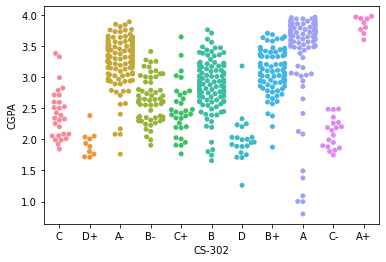

In [309]:
print('unique values ',data['CS-302'].unique())
print('value count ',data['CS-302'].value_counts())
sns.swarmplot(x='CS-302',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-302', ylabel='count'>

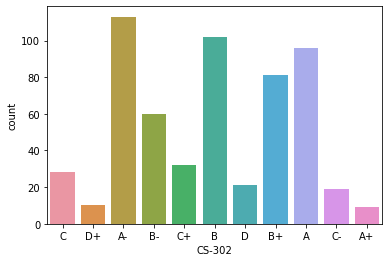

In [310]:
sns.countplot(data['CS-302'])

Most students scored A- while very less scored A+. Nobody got F /WU/W grade in this subject

unique values  ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']
value count  A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


<AxesSubplot:xlabel='CY-105', ylabel='CGPA'>

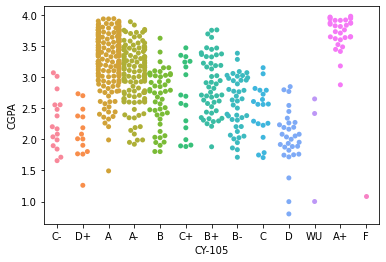

In [311]:
print('unique values ',data['CY-105'].unique())
print('value count ',data['CY-105'].value_counts())
sns.swarmplot(x='CY-105',y='CGPA',data=data)

<AxesSubplot:xlabel='CY-105', ylabel='count'>

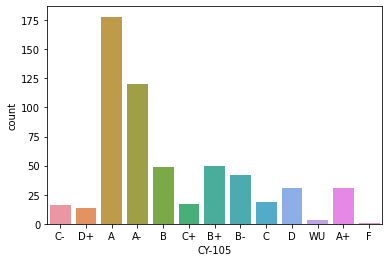

In [312]:
sns.countplot(data['CY-105'])

Most students scored A grade. Only 1 got F

unique values  ['C+' 'C-' 'B' 'D+' 'C' 'B+' 'B-' 'D' 'A-' 'A' 'F' 'A+']
value count  A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


<AxesSubplot:xlabel='TC-383', ylabel='CGPA'>

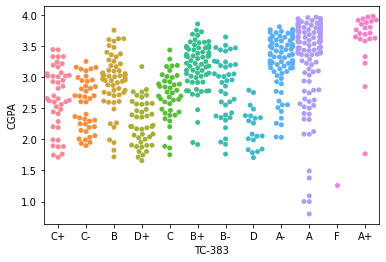

In [313]:
print('unique values ',data['TC-383'].unique())
print('value count ',data['TC-383'].value_counts())
sns.swarmplot(x='TC-383',y='CGPA',data=data)

<AxesSubplot:xlabel='TC-383', ylabel='count'>

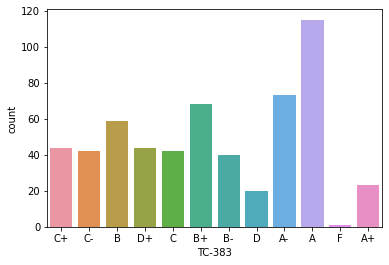

In [314]:
sns.countplot(data['TC-383'])

Most students secured A while very less students secured A+

unique values  ['B+' 'C-' 'A' 'A-' 'B' 'A+' 'C+' 'B-' 'C' 'D+' 'D' 'F']
value count  A     140
A-    140
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64


<AxesSubplot:xlabel='MT-442', ylabel='CGPA'>

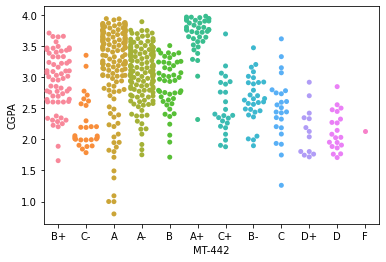

In [315]:
print('unique values ',data['MT-442'].unique())
print('value count ',data['MT-442'].value_counts())
sns.swarmplot(x='MT-442',y='CGPA',data=data)

<AxesSubplot:xlabel='MT-442', ylabel='count'>

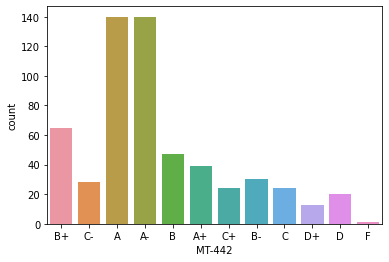

In [316]:
sns.countplot(data['MT-442'])

Equal no of students secured A and A-.Some good number of students scored B+.

unique values  ['C' 'B+' 'D+' 'A-' 'B' 'A' 'B-' 'C-' 'C+' 'D' 'A+' 'F' 'WU']
value count  A-    96
A     85
B+    68
B     67
B-    62
C     49
C+    38
C-    32
D+    22
D     22
A+    20
F      9
WU     1
Name: EL-332, dtype: int64


<AxesSubplot:xlabel='EL-332', ylabel='CGPA'>

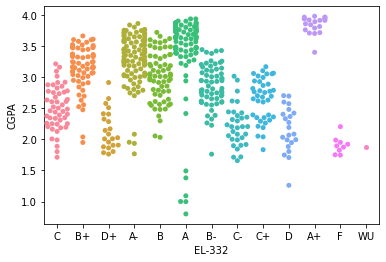

In [317]:
print('unique values ',data['EL-332'].unique())
print('value count ',data['EL-332'].value_counts())
sns.swarmplot(x='EL-332',y='CGPA',data=data)

<AxesSubplot:xlabel='EL-332', ylabel='count'>

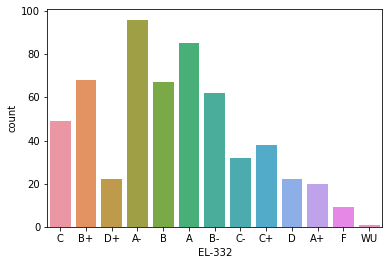

In [318]:
sns.countplot(data['EL-332'])

Most students scored A- and very less students scored A+.

unique values  ['C-' 'A-' 'B+' 'B-' 'C' 'B' 'C+' 'D' 'D+' 'A' 'A+' 'WU' 'F' 'W']
value count  A-    89
B-    69
B     68
B+    65
C     53
A     51
C+    49
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64


<AxesSubplot:xlabel='CS-318', ylabel='CGPA'>

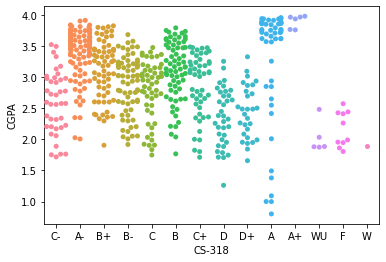

In [319]:
print('unique values ',data['CS-318'].unique())
print('value count ',data['CS-318'].value_counts())
sns.swarmplot(x='CS-318',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-318', ylabel='count'>

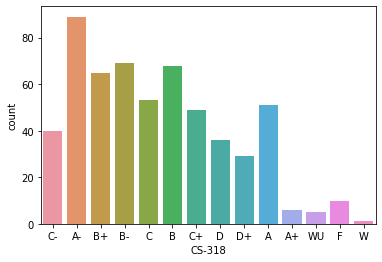

In [320]:
sns.countplot(data['CS-318'])

Most students scored A- while only 6 students scored A+.

unique values  ['C' 'D' 'A-' 'C-' 'B+' 'C+' 'B-' 'B' 'A' 'D+' 'A+' 'F' 'WU']
value count  A-    120
A      83
B+     75
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64


<AxesSubplot:xlabel='CS-306', ylabel='CGPA'>

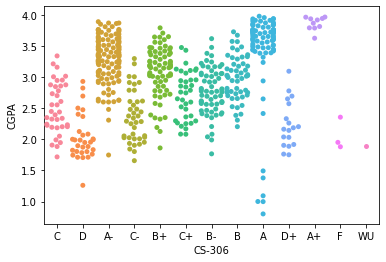

In [321]:
print('unique values ',data['CS-306'].unique())
print('value count ',data['CS-306'].value_counts())
sns.swarmplot(x='CS-306',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-306', ylabel='count'>

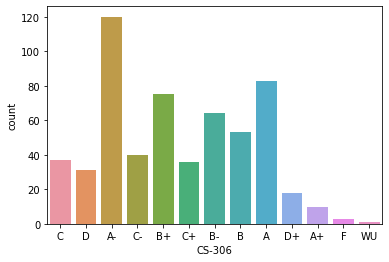

In [322]:
sns.countplot(data['CS-306'])

Most students scored A- and only 3 students got F in this subject.

unique values  ['C-' 'D+' 'B' 'B-' 'C' 'B+' 'C+' 'A-' 'D' 'A' 'F' 'A+' 'W' 'WU']
value count  A     96
A+    93
A-    63
D+    52
C     48
C-    44
B+    42
B     37
C+    37
B-    36
D     19
F      2
W      1
WU     1
Name: CS-312, dtype: int64


<AxesSubplot:xlabel='CS-312', ylabel='CGPA'>

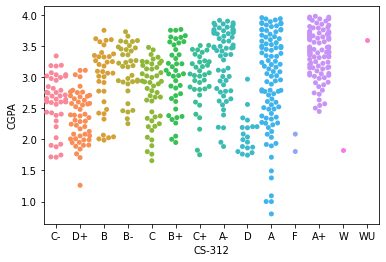

In [323]:
print('unique values ',data['CS-312'].unique())
print('value count ',data['CS-312'].value_counts())
sns.swarmplot(x='CS-312',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-312', ylabel='count'>

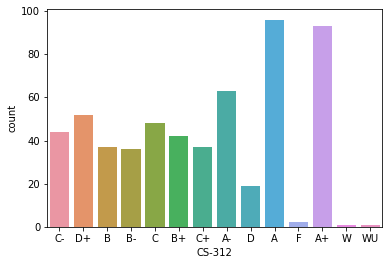

In [324]:
sns.countplot(data['CS-312'])

Almost equal number of students scored A and A+ in this subject.

unique values  ['C-' 'D' 'B' 'C' 'B+' 'B-' 'A-' 'D+' 'C+' 'A' 'A+' 'F']
value count  B-    79
B     75
C     70
A-    66
A     59
B+    58
C+    57
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64


<AxesSubplot:xlabel='CS-317', ylabel='CGPA'>

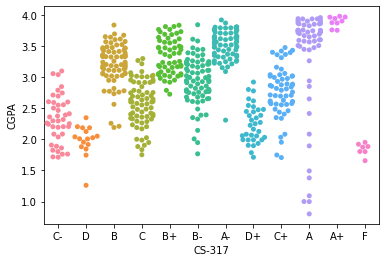

In [325]:
print('unique values ',data['CS-317'].unique())
print('value count ',data['CS-317'].value_counts())
sns.swarmplot(x='CS-317',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-317', ylabel='count'>

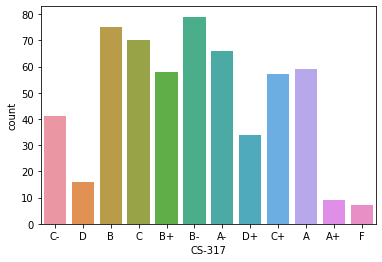

In [326]:
sns.countplot(data['CS-317'])

almost most students scored B-,B, C grades. 

unique values  ['C-' 'C' 'A' 'D+' 'B+' 'C+' 'B-' 'A-' 'B' 'A+' 'D']
value count  A     145
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64


<AxesSubplot:xlabel='CS-403', ylabel='CGPA'>

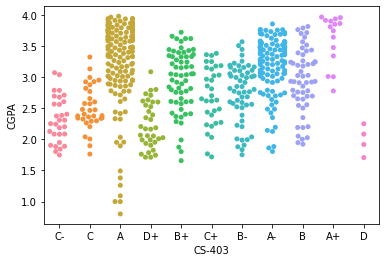

In [327]:
print('unique values ',data['CS-403'].unique())
print('value count ',data['CS-403'].value_counts())
sns.swarmplot(x='CS-403',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-403', ylabel='count'>

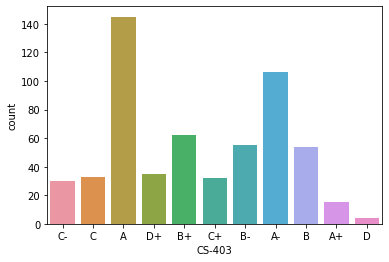

In [328]:
sns.countplot(data['CS-403'])

Most students scored A while only 3 people secured D grade

unique values  ['C-' 'D' 'C' 'B-' 'C+' 'B+' 'D+' 'B' 'A' 'A-' 'F' 'A+' 'W']
value count  B     86
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
A     37
D+    36
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64


<AxesSubplot:xlabel='CS-421', ylabel='CGPA'>

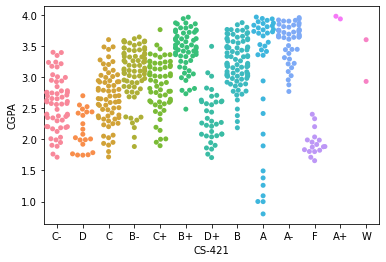

In [329]:
print('unique values ',data['CS-421'].unique())
print('value count ',data['CS-421'].value_counts())
sns.swarmplot(x='CS-421',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-421', ylabel='count'>

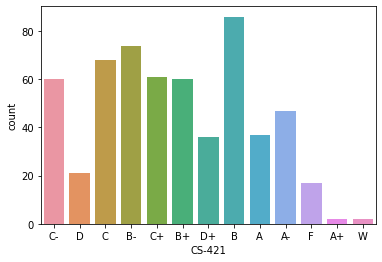

In [330]:
sns.countplot(data['CS-421'])

Most students stored B grade while only 2 people scored A+

unique values  ['A-' 'A' 'B-' 'B' 'B+' 'C+' 'D' 'D+' 'C-' 'C' 'A+' 'F' 'W' 'WU']
value count  A-    177
A     164
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: CS-406, dtype: int64


<AxesSubplot:xlabel='CS-406', ylabel='CGPA'>

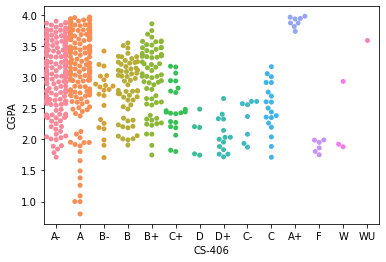

In [331]:
print('unique values ',data['CS-406'].unique())
print('value count ',data['CS-406'].value_counts())
sns.swarmplot(x='CS-406',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-406', ylabel='count'>

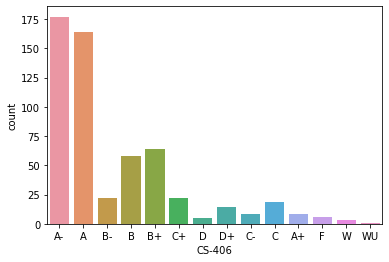

In [332]:
sns.countplot(data['CS-406'])

Most number of students secured A- and A grade

unique values  ['A' 'B-' 'B' 'A-' 'B+' 'A+' 'C' 'C-' 'C+' 'F' 'D+' 'W' 'D']
value count  A     189
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W       2
Name: CS-414, dtype: int64


<AxesSubplot:xlabel='CS-414', ylabel='CGPA'>

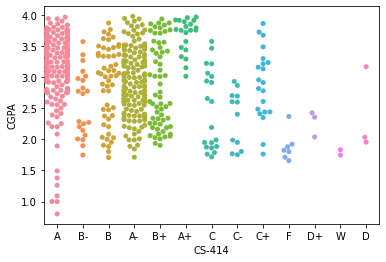

In [333]:
print('unique values ',data['CS-414'].unique())
print('value count ',data['CS-414'].value_counts())
sns.swarmplot(x='CS-414',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-414', ylabel='count'>

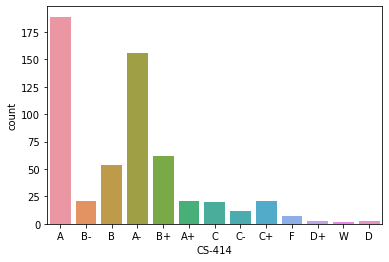

In [334]:
sns.countplot(data['CS-414'])

Most students scored A grade followed by A- grade. very less students scored D

unique values  ['C-' 'C' 'A' 'C+' 'A-' 'B+' 'B-' 'B' 'D+' 'A+' 'D' 'F']
value count  A-    120
B      89
B+     85
B-     78
A      69
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64


<AxesSubplot:xlabel='CS-419', ylabel='CGPA'>

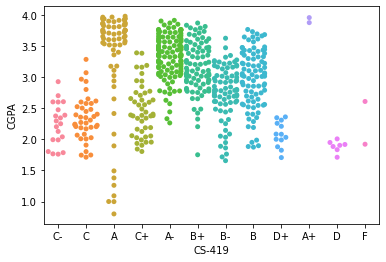

In [335]:
print('unique values ',data['CS-419'].unique())
print('value count ',data['CS-419'].value_counts())
sns.swarmplot(x='CS-419',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-419', ylabel='count'>

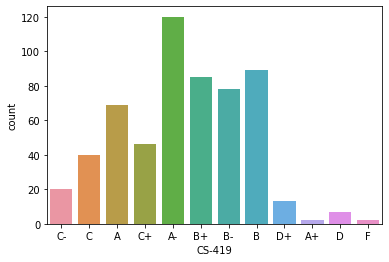

In [336]:
sns.countplot(data['CS-419'])

Most students scored A- ahile only 2 people scored F

unique values  ['B' 'C' 'A-' 'C+' 'B-' 'B+' 'C-' 'A' 'D+' 'D' 'A+' 'F']
value count  A-    122
A      92
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64


<AxesSubplot:xlabel='CS-423', ylabel='CGPA'>

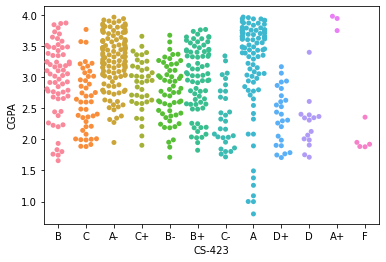

In [337]:
print('unique values ',data['CS-423'].unique())
print('value count ',data['CS-423'].value_counts())
sns.swarmplot(x='CS-423',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-423', ylabel='count'>

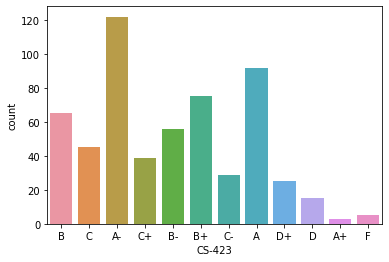

In [338]:
sns.countplot(data['CS-423'])

Most of the students scored A-. only 3 students scored A+ in this subject

unique values  ['A-' 'B' 'A' 'C+' 'B+' 'C-' 'B-' 'A+' 'C' 'D+' 'F' 'W' 'D']
value count  A-    157
A     156
B+     80
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64


<AxesSubplot:xlabel='CS-412', ylabel='CGPA'>

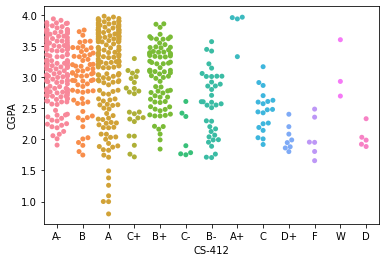

In [339]:
print('unique values ',data['CS-412'].unique())
print('value count ',data['CS-412'].value_counts())
sns.swarmplot(x='CS-412',y='CGPA',data=data)

<AxesSubplot:xlabel='CS-412', ylabel='count'>

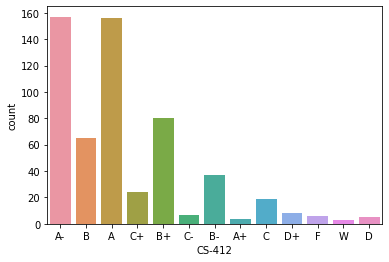

In [340]:
sns.countplot(data['CS-412'])

almost equal number of students scored A and A-

<AxesSubplot:xlabel='CGPA'>

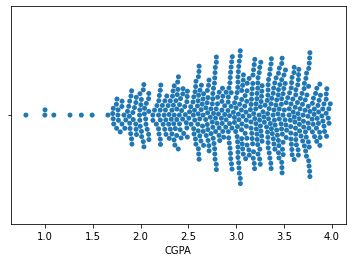

In [341]:
sns.swarmplot(x='CGPA',data=data)

Observation: 
- Students CGPA ranges from 1.7 approx to upto 4.
- Some students scored less than 1 CGPA.
    

# Encoding the dataset using label encoder for all the categorical data.

In [342]:
#importing library
from sklearn.preprocessing import LabelEncoder

In [343]:
#saving the encoder in variable
label_enc=LabelEncoder()

In [344]:
#applying label encoder to specified columns

df1=label_enc.fit_transform(data['PH-121'])
df2=label_enc.fit_transform(data['HS-101'])
df3=label_enc.fit_transform(data['CY-105'])
df4=label_enc.fit_transform(data['HS-105/12'])
df5=label_enc.fit_transform(data['MT-111'])
df6=label_enc.fit_transform(data['CS-105'])
df7=label_enc.fit_transform(data['CS-106'])
df8=label_enc.fit_transform(data['EL-102'])
df9=label_enc.fit_transform(data['EE-119'])
df10=label_enc.fit_transform(data['ME-107'])
df11=label_enc.fit_transform(data['CS-107'])
df12=label_enc.fit_transform(data['HS-205/20'])
df13=label_enc.fit_transform(data['MT-222'])
df14=label_enc.fit_transform(data['EE-222'])
df15=label_enc.fit_transform(data['MT-224'])
df16=label_enc.fit_transform(data['CS-210'])
df17=label_enc.fit_transform(data['CS-211'])
df18=label_enc.fit_transform(data['CS-203'])
df19=label_enc.fit_transform(data['CS-214'])
df20=label_enc.fit_transform(data['EE-217'])
df21=label_enc.fit_transform(data['CS-212'])
df22=label_enc.fit_transform(data['CS-215'])
df23=label_enc.fit_transform(data['MT-331'])
df24=label_enc.fit_transform(data['EF-303'])
df25=label_enc.fit_transform(data['HS-304'])
df26=label_enc.fit_transform(data['CS-301'])
df27=label_enc.fit_transform(data['CS-302'])
df28=label_enc.fit_transform(data['TC-383'])
df29=label_enc.fit_transform(data['MT-442'])
df30=label_enc.fit_transform(data['EL-332'])
df31=label_enc.fit_transform(data['CS-318'])
df32=label_enc.fit_transform(data['CS-306'])
df33=label_enc.fit_transform(data['CS-312'])
df34=label_enc.fit_transform(data['CS-317'])
df35=label_enc.fit_transform(data['CS-403'])
df36=label_enc.fit_transform(data['CS-421'])
df37=label_enc.fit_transform(data['CS-406'])
df38=label_enc.fit_transform(data['CS-414'])
df39=label_enc.fit_transform(data['CS-419'])
df40=label_enc.fit_transform(data['CS-423'])
df41=label_enc.fit_transform(data['CS-412'])

In [345]:
#saving encoded data to their respctive columns

data['PH-121']=df1
data['HS-101']=df2
data['CY-105']=df3
data['HS-105/12']=df4
data['MT-111']=df5
data['CS-105']=df6
data['CS-106']=df7
data['EL-102']=df8
data['EE-119']=df9
data['ME-107']=df10
data['CS-107']=df11
data['HS-205/20']=df12
data['MT-222']=df13
data['EE-222']=df14
data['MT-224']=df15
data['CS-210']=df16
data['CS-211']=df17
data['CS-203']=df18
data['CS-214']=df19
data['EE-217']=df20
data['CS-212']=df21
data['CS-215']=df22
data['MT-331']=df23
data['EF-303']=df24
data['HS-304']=df25
data['CS-301']=df26
data['CS-302']=df27
data['TC-383']=df28
data['MT-442']=df29
data['EL-332']=df30
data['CS-318']=df31
data['CS-306']=df32
data['CS-312']=df33
data['CS-317']=df34
data['CS-403']=df35
data['CS-421']=df36
data['CS-406']=df37
data['CS-414']=df38
data['CS-419']=df39
data['CS-423']=df40
data['CS-412']=df41

In [346]:
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


All the columns are encoded

In [347]:
#plotting heatmap to check for coorelation

<AxesSubplot:>

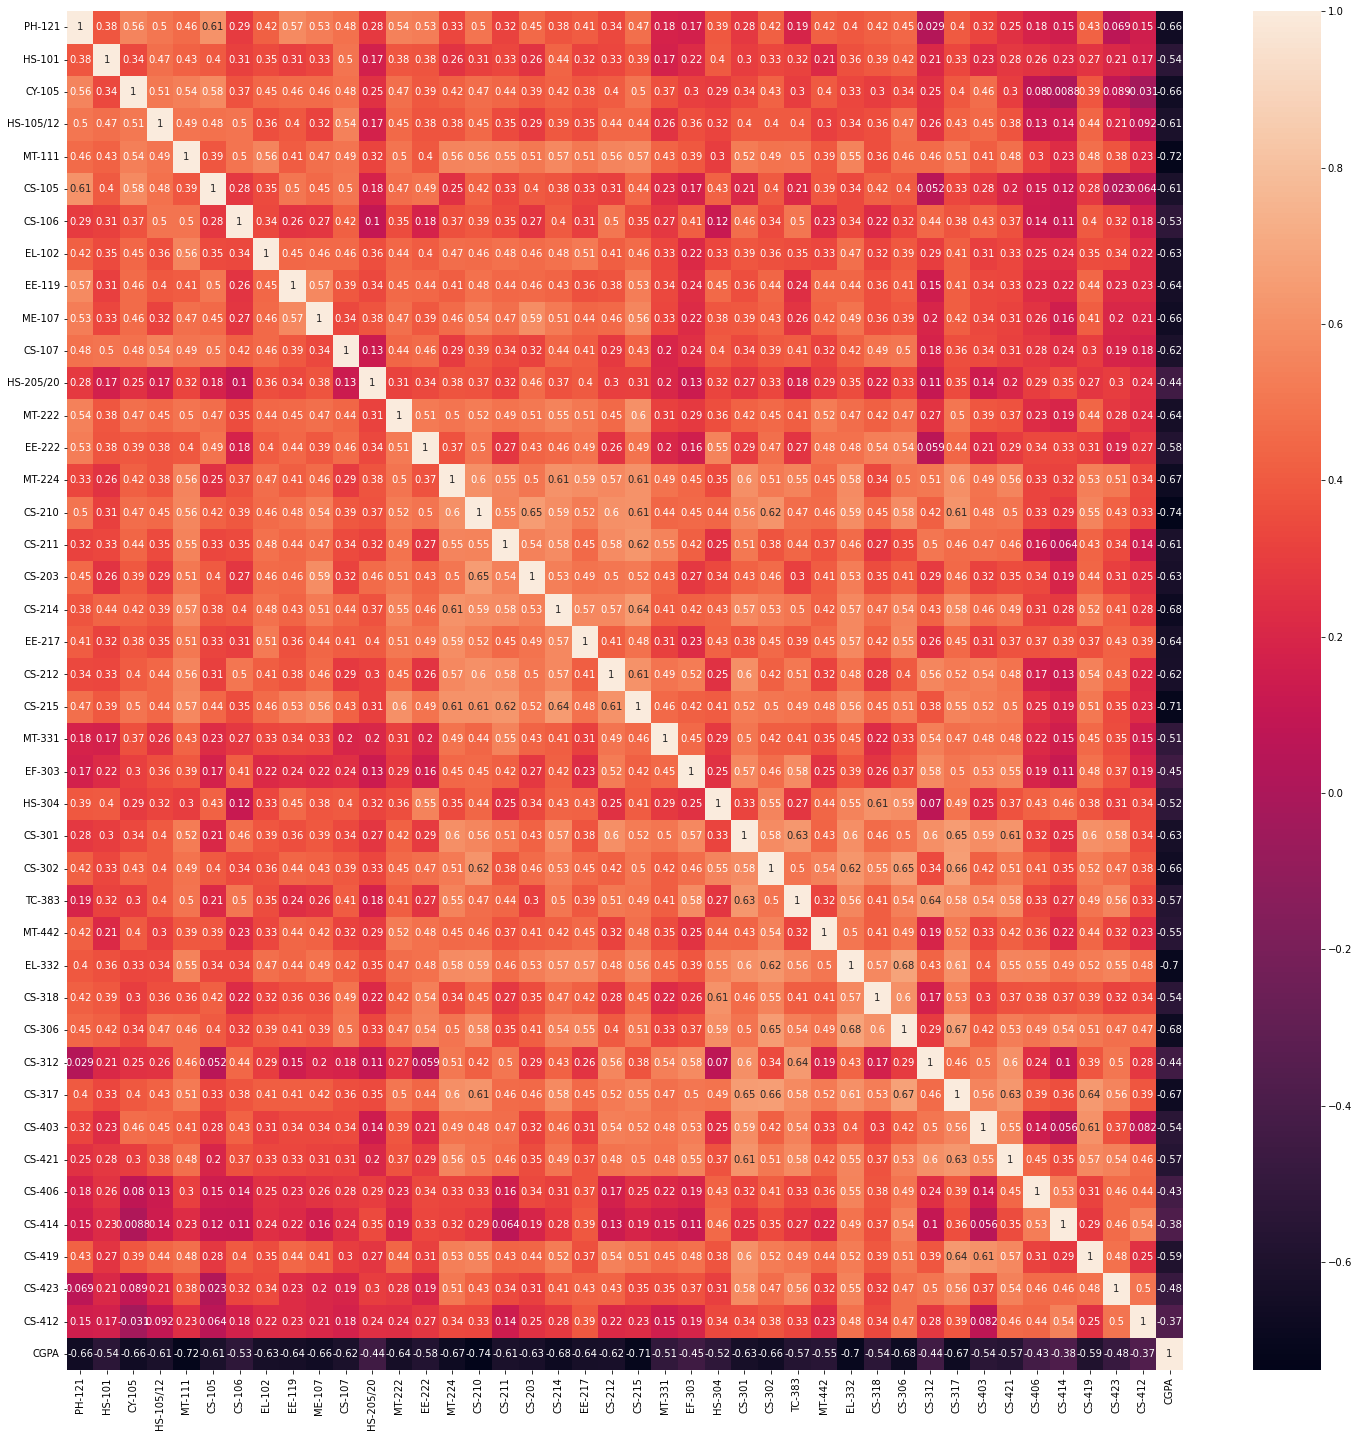

In [348]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

Observation:
- Most coorelation is seen of 68% between 3rd year subjects namely CS-306 and EL-332 
- also relationship seen between CS306 with CS-317 for 67%.
- There is no coorelation seen for >70%.

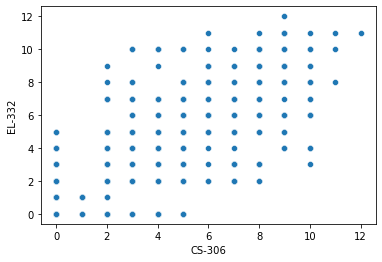

In [349]:
sns.scatterplot(x='CS-306',y='EL-332',data=data)
plt.show()

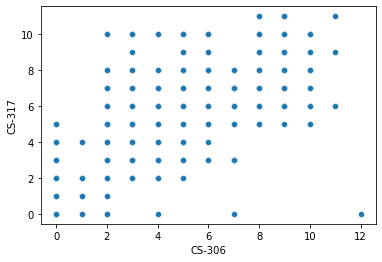

In [350]:
sns.scatterplot(x='CS-306',y='CS-317',data=data)
plt.show()

Even both above plots show good positive relation.

 # Since there is no coorelation for >70% within features (as I take 70% correlation cutoff) correlation no columns will be dropped.

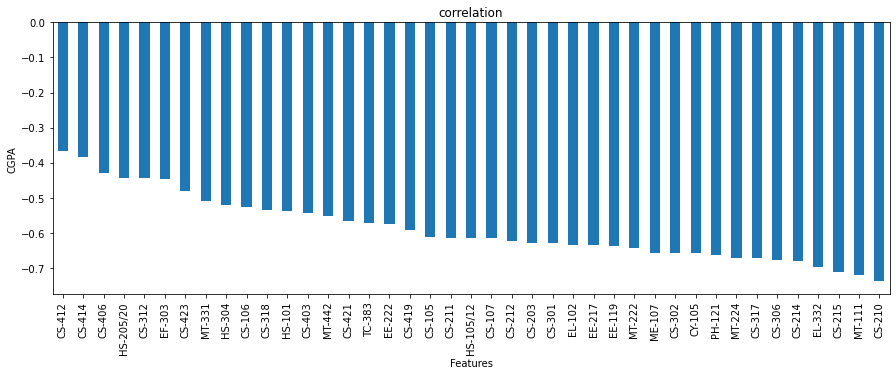

In [351]:
# Plotting relationship of all columns wrt label

plt.figure(figsize=(15,5))
data.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('CGPA')
plt.title('correlation')
plt.show()

Observation:
- All the columns show good correlation  with label.
- CS-210 subject is contributing most for CGPA while CS-412 contributes the least.

# All the columns are important for CGPA, hence feature selection technique will not be used. Hence moving forward with model building part.

# Splitting data into features and label

In [352]:
x=data.drop(['CGPA'],axis=1)
y=data['CGPA']

In [353]:
# shape of features
x.shape

(571, 41)

In [354]:
#shape of label
y.shape

(571,)

# Model building part

In [355]:

#importing library for regression model
from sklearn.linear_model import LinearRegression

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [356]:
#assigning variable lr for linear regression model

lr=LinearRegression()

In [357]:
# finding best random state for 
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)

training score is  89.81496741963828  for random state  0
testing score is  93.37131929065599  for random state  0
training score is  89.70061303450466  for random state  1
testing score is  93.8773310059238  for random state  1
training score is  90.23908196464095  for random state  2
testing score is  90.74785888123958  for random state  2
training score is  90.54076485671008  for random state  3
testing score is  89.89672768838243  for random state  3
training score is  90.12666035787811  for random state  4
testing score is  91.33761375292949  for random state  4
training score is  90.6216292426237  for random state  5
testing score is  88.87499704955017  for random state  5
training score is  89.79478208500133  for random state  6
testing score is  93.66170060955342  for random state  6
training score is  89.91357501360841  for random state  7
testing score is  93.64010213168854  for random state  7
training score is  90.18099177333457  for random state  8
testing score is  90.912

In [358]:
#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [359]:
#training the model

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [360]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=lr.predict(x_train) 

pred=lr.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:90.54%
testing R2 score:89.90%


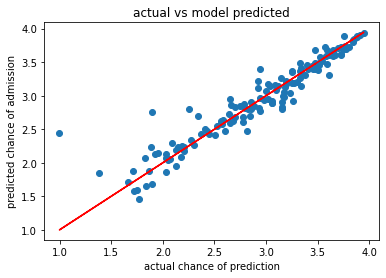

In [361]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual chance of prediction')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [362]:
#importing library for MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [363]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 0.12236693953899848
root mean squared error 0.20473174526351287


# Checking if the model is overfitted or not hence applying LASSO and RIDGE regularization methods

In [364]:
#importing necessary library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# LASSO CV

In [365]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True) #finding learning rate

#LASSOCV getting trained on training data
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [366]:
#using learning rate the model learnt and gave alpha value
alpha=lasscv.alpha_
alpha

0.00010713249422281589

In [367]:
#using Lasso regression with best alpha value provided

lasso_reg=Lasso(alpha)

#Training model with lasso regression
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010713249422281589)

In [368]:
#printing Lasso regression score 

print('Lasso CV score for training data',(lasso_reg.score(x_train,y_train))*100)
print('Lasso CV score for testing data',(lasso_reg.score(x_test,y_test))*100)

Lasso CV score for training data 90.54073161125521
Lasso CV score for testing data 89.91149699833849


# RIDGE CV

In [369]:
#setting parameters for ridge CV

ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

#training on training  dataset with above mentioned parameters that will provide best alpha rate
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [370]:
ridgeCV.alpha_ #best alpha value for model

0.09099999999999998

In [371]:
#using alpha value to train ridge model

ridge_model=Ridge(alpha=ridgeCV.alpha_)


#training model on train data set
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [372]:
#printing ridgeCV score
print('RidgeCV score  for training data' ,(ridge_model.score(x_test,y_test))*100) 
print('RidgeCV score for testing data' ,(ridge_model.score(x_test,y_test))*100) 

RidgeCV score  for training data 89.89713516142137
RidgeCV score for testing data 89.89713516142137


# Note
 Since the LASSO and RIDGE scores are almost same, hance model is not overfitted

# USING OTHER REGRESSION MODELS

In [373]:
#importing libraries for Random forests,Adaboost and Xgboost regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [374]:
#saving models in variables
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
dt=DecisionTreeRegressor()

# Random Forests model

In [375]:
#train_test split and taking same random state as for linear regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

#training the model
rf.fit(x_train,y_train)

#predicting model on train and test data
y_pred_rf=rf.predict(x_train)
pred_rf=rf.predict(x_test)


print(f'Training R2 score for random forests regressor model:{r2_score(y_train,y_pred_rf)*100:.2f}%')
print(f'Testing R2 score for random forests regressor model:{r2_score(y_test,pred_rf)*100:.2f}%')

Training R2 score for random forests regressor model:97.57%
Testing R2 score for random forests regressor model:90.96%


In [376]:
#importing library for cross validation score

from sklearn.model_selection import cross_val_score

In [377]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  86.81437943412263
At cv:- 3
cross validation score:-  85.67712529075396
At cv:- 4
cross validation score:-  84.30079232885019
At cv:- 5
cross validation score:-  87.52465755623021
At cv:- 6
cross validation score:-  86.90653336971359
At cv:- 7
cross validation score:-  87.71391976663728
At cv:- 8
cross validation score:-  87.67409872254109
At cv:- 9
cross validation score:-  87.68871130757913
At cv:- 10
cross validation score:-  88.21294730353921
At cv:- 11
cross validation score:-  88.27807852297667


In [378]:
#finding cross validation score
cvs_rf=cross_val_score(rf,x,y,cv=11).mean()
print('Cross Validation Score for Random forests regressor model is- ',((cvs_rf)*100))

Cross Validation Score for Random forests regressor model is-  88.0377033522438


In [379]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_rf))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_rf)))

mean absolute error 0.11694440559440555
root mean squared error 0.1936593078820914


# AdaBoost Model

In [380]:
#train_test split and taking same random state as for linear regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

#training the model
ab.fit(x_train,y_train)

#predicting model on train and test data
y_pred_ab=ab.predict(x_train)
pred_ab=ab.predict(x_test) 


print(f'Training R2 score for AdaBoost regressor model:{r2_score(y_train,y_pred_ab)*100:.2f}%')
print(f'Testing R2 score for AdaBoost forests regressor model:{r2_score(y_test,pred_ab)*100:.2f}%')

Training R2 score for AdaBoost regressor model:93.28%
Testing R2 score for AdaBoost forests regressor model:91.01%


In [381]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(ab,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  81.89133633968673
At cv:- 3
cross validation score:-  80.47309396050822
At cv:- 4
cross validation score:-  77.06414258797503
At cv:- 5
cross validation score:-  84.1050989484092
At cv:- 6
cross validation score:-  82.56858535472523
At cv:- 7
cross validation score:-  84.2003335083203
At cv:- 8
cross validation score:-  83.65253396812065
At cv:- 9
cross validation score:-  85.56641833782354
At cv:- 10
cross validation score:-  84.2892056071452
At cv:- 11
cross validation score:-  84.96618535137496


In [382]:
#cross validation score
cvs_ab=cross_val_score(ab,x,y,cv=11).mean()
print('Cross Validation Score for AdaBoost regressor model is- ',((cvs_ab)*100))

Cross Validation Score for AdaBoost regressor model is-  85.21180841491112


In [383]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_ab))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_ab)))

mean absolute error 0.15694757996937167
root mean squared error 0.19310066605508042


# Decision Tree Model

In [384]:
#train_test split and taking same random state as for linear regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

#training the model
dt.fit(x_train,y_train)

#predicting model on train and test data
y_pred_dt=dt.predict(x_train)
pred_dt=dt.predict(x_test) 


print(f'Training R2 score for Decision Tree regressor model:{r2_score(y_train,y_pred_dt)*100:.2f}%')
print(f'Testing R2 score for Decision Tree regressor model:{r2_score(y_test,pred_dt)*100:.2f}%')

Training R2 score for Decision Tree regressor model:100.00%
Testing R2 score for Decision Tree regressor model:69.20%


In [385]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  47.020732378979126
At cv:- 3
cross validation score:-  64.20972290734527
At cv:- 4
cross validation score:-  67.77491451486708
At cv:- 5
cross validation score:-  61.477708311772176
At cv:- 6
cross validation score:-  71.63499423418057
At cv:- 7
cross validation score:-  72.13034138761681
At cv:- 8
cross validation score:-  71.67064226251551
At cv:- 9
cross validation score:-  73.19473036256576
At cv:- 10
cross validation score:-  74.91942178160208
At cv:- 11
cross validation score:-  66.82950617788757


In [386]:
#cross validation score
cvs_dt=cross_val_score(dt,x,y,cv=10).mean()
print('Cross Validation Score for AdaBoost regressor model is- ',((cvs_dt)*100))

Cross Validation Score for AdaBoost regressor model is-  73.6970423640453


In [387]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_dt))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_dt)))

mean absolute error 0.2350979020979021
root mean squared error 0.35745108717176916


# Dataframe showing model_wise training & testing accuracy scores alongwith RMSE scores

In [388]:
column=pd.DataFrame({'Model':['Linear Regression','Random Forests','AdaBoost Model','Decision Tree '],
                    'Training scores':[90.54,97.57,93.28,100],
                    'Testing scores':[89.90,90.96,91.01,69],
                    'RMSE':[0.20,0.19,0.19,0.35]})
column

,Model,Training scores,Testing scores,RMSE
0,Linear Regression,90.54,89.90,0.20
1,Random Forests,97.57,90.96,0.19
2,AdaBoost Model,93.28,91.01,0.19
3,Decision Tree,100.00,69.00,0.35


# Note:
- The Decision tree has seen all the data but testing score is low,
- The Random Forest have good training and testing accuracy as well its RMSE score is lowest with respect to other models. Hence going forward with hyperparameter tuning of Random Forest Regressor

# Hyperparameter tuning Using Random Forests regressor model

In [389]:
#hyperparameter tuning on random forests model
rf1=RandomForestRegressor()

In [390]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [391]:
#setting parameters for model

params=[{'n_estimators':[10,20],
       'criterion':['squared_error', 'absolute_error', 'poisson'],
       'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}]

In [392]:
#instantiating model with parameters provided

grid_search=GridSearchCV(estimator=rf1,param_grid=params,cv=11)

In [393]:
#training model with all the parameters to find best parameters
grid_search.fit(x_train,y_train)

GridSearchCV(cv=11, estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'absolute_error',
                                        'poisson'],
                          'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                          'min_samples_split': [10, 11],
                          'n_estimators': [10, 20]}])

In [394]:
#printing best parameters that increases score 
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'poisson', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 20}


In [395]:
#using best parameters fetched into random forest model and using it on train data

rf1=RandomForestRegressor(criterion='poisson',
                          max_depth=15, 
                          min_samples_leaf= 5, 
                          min_samples_split= 10, 
                          n_estimators= 20)
rf1.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=20)

In [396]:
#learning model on train and test data and printing score

y_pred_rf1=rf1.predict(x_train)
pred_rf1=rf1.predict(x_test)
print(f'Training R2 score for random forests after hyperparameter tuning:{r2_score(y_train,y_pred_rf1)*100:.2f}%')
print(f'Testing R2 score for random forests after hyperparameter tuning:{r2_score(y_test,pred_rf1)*100:.2f}%')

Training R2 score for random forests after hyperparameter tuning:92.30%
Testing R2 score for random forests after hyperparameter tuning:89.20%


In [397]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_rf1))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_rf1)))

mean absolute error 0.1318462807414197
root mean squared error 0.2116832670340372


# Note:
- Since the tuned model provides less accuracy than non tuned model, then original non tuned Random Forest Regressor model is selected as best model

# saving the model using pickle

In [398]:
import pickle

In [399]:
pickle.dump(rf,open('CGPA_rf','wb'))